In [4]:
import os
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import utils

data_path = '../data/non_gaussian.csv'
log_path = '../results_1b/'

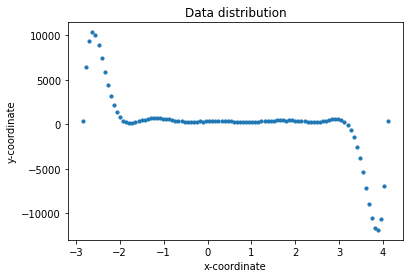

In [5]:
# Data Visualisation
f = open(data_path, 'r')
input_x, target = [], []
for line in f.readlines():
    nums = line.strip().split(',')
    input_x.append(float(nums[0]))
    target.append(float(nums[1]))
f.close()
plt.scatter(input_x, target, s=10)
plt.title('Data distribution')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

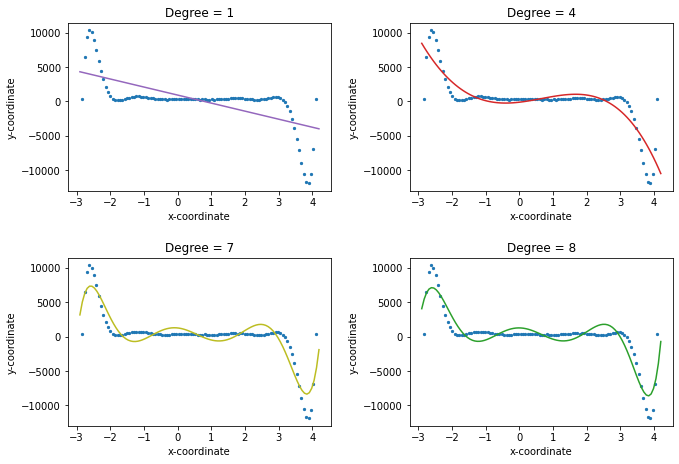

In [23]:
# Plots of Polynomials of different degree
deg_wts_file = 'polynomial_deg_wts.txt'
f = open(os.path.join(log_path, deg_wts_file), 'r')
x, y = np.linspace(-2.9, 4.2, 100), []

for line in f.readlines():
    tokens = line.strip().split()
    y_out = utils.get_output_from_weights(x, tokens[3])
    y.append(y_out)
f.close()

fig, axs = plt.subplots(2, 2)
deg_list = [1, 4, 7, 9]
colors = ['tab:purple', 'tab:red', 'tab:olive', 'tab:green']
    
for (ax, deg, col) in zip(axs.flat, deg_list, colors):
    ax.plot(x, y[deg],col)
    ax.scatter(input_x, target, s=5)
    ax.set(xlabel='x-coordinate', ylabel='y-coordinate')
    ax.set_title(f'Degree = {deg}')

plt.subplots_adjust(left=0, bottom=0, right=1.4, top=1.4, wspace=0.3, hspace=0.4)
plt.show()

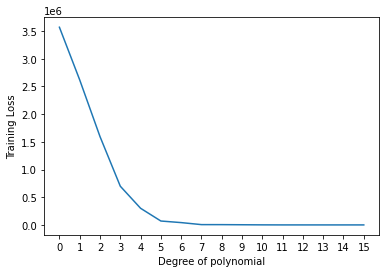

In [12]:
# Plot of Loss v/s Degree of polynomial
deg_loss_file = 'polynomial_deg_loss.txt'
f = open(os.path.join(log_path, deg_loss_file), 'r')

train_loss, test_loss = [], []

for line in f.readlines():
    tokens = line.strip().split()
    train_loss.append(float(tokens[4]))
    test_loss.append(float(tokens[7]))
f.close()    

plt.plot(train_loss)
plt.ylabel('Training Loss')
plt.xlabel('Degree of polynomial')
plt.xticks(list(range(len(train_loss))))
plt.show()

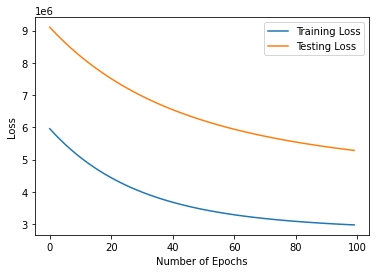

In [13]:
# Plots for Loss v/s epochs for Gradient Descent
grad_loss_file = 'grad_descent_loss.txt'
f = open(os.path.join(log_path, grad_loss_file), 'r')

train_loss, test_loss = [], []

for line in f.readlines():
    tokens = line.strip().split()
    train_loss.append(float(tokens[4]))
    test_loss.append(float(tokens[8]))
f.close()
        
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

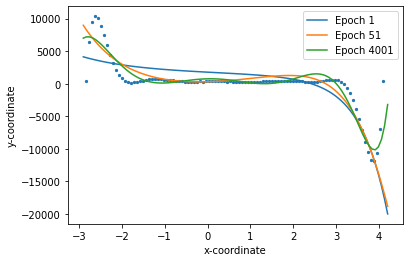

In [15]:
# Plots of Polynomials at various epochs
grad_wts_file = 'grad_descent_wts.txt'
f = open(os.path.join(log_path, grad_wts_file), 'r')

x, y = np.linspace(-2.9, 4.2, 100), []

lines = f.readlines()
epochs = [1, 51, 4001]
lines = [lines[e-1] for e in epochs]
for line in lines:
    tokens = line.strip().split()
    y_out = utils.get_output_from_weights(x, tokens[3])
    y.append(y_out)
f.close()

# Plot graphs for epoch 1, 51, 4001
plt.scatter(input_x, target, s=5)
for (epoch, y_out) in zip(epochs, y):
    plt.plot(x,y_out, label=f'Epoch {epoch}')
plt.legend()
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

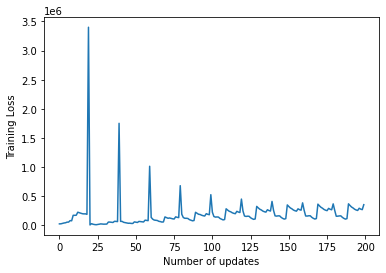

In [16]:
# Plots for Loss v/s epochs for Stochastic Gradient Descent
stoc_loss_file = 'stochastic_loss.txt'
f = open(os.path.join(log_path, stoc_loss_file), 'r')

train_loss = []

for line in f.readlines():
    tokens = line.strip().split()
    train_loss.append(float(tokens[-1]))
f.close()
        
plt.plot(train_loss[:200])
plt.ylabel('Training Loss')
plt.xlabel('Number of updates')
plt.show()

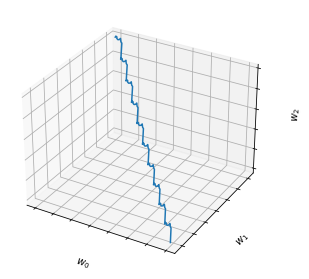

In [17]:
# Plots of weights in parameter space for Stochastic gradient descent
stoc_wts_file = 'stochastic_wts.txt'
f = open(os.path.join(log_path, stoc_wts_file), 'r')
stoc_wts_x, stoc_wts_y, stoc_wts_z = [], [], []

for line in f.readlines():
    tokens = line.strip().split()
    wts = utils.get_weights_from_text(tokens[-1])
    stoc_wts_x.append(wts[0])
    stoc_wts_y.append(wts[1])
    stoc_wts_z.append(wts[2])
f.close()

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot3D(stoc_wts_x, stoc_wts_y, stoc_wts_z)
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_zlabel('$w_2$')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.subplots_adjust(left=0, bottom=0, right=1.4, top=1.4, wspace=0.3, hspace=0.4)
plt.show()

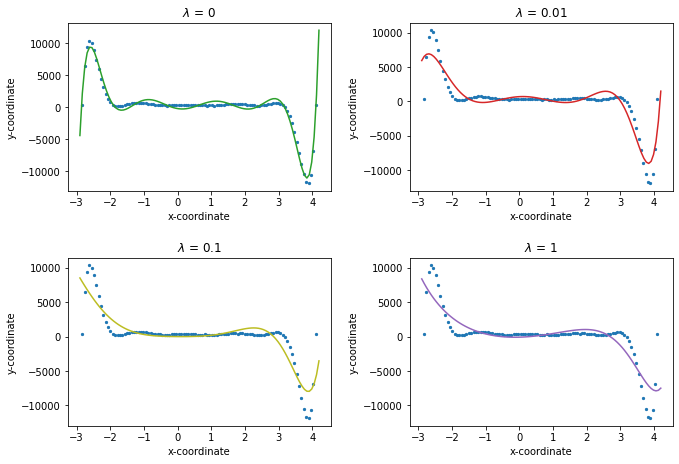

In [19]:
# Plots of Polynomials obtained on different regularization constants
lambda_file = 'lambda_wts.txt'
f = open(os.path.join(log_path, lambda_file), 'r')
x, y, lamb = np.linspace(-2.9, 4.2, 100), [], []

for line in f.readlines():
    tokens = line.strip().split()
    y_out = utils.get_output_from_weights(x, line.strip().split()[3])
    y.append(y_out)
    lamb.append(tokens[1][:-1])
f.close()
    
fig, axs = plt.subplots(2, 2)
colors = ['tab:green', 'tab:red', 'tab:olive', 'tab:purple']
    
for (ax, y_out, l, col) in zip(axs.flat, y, lamb, colors):
    ax.plot(x, y_out, col)
    ax.scatter(input_x, target, s=5)
    ax.set(xlabel='x-coordinate', ylabel='y-coordinate')
    ax.set_title(f'$\lambda$ = {l}')

plt.subplots_adjust(left=0, bottom=0, right=1.4, top=1.4, wspace=0.3, hspace=0.4)

plt.show()

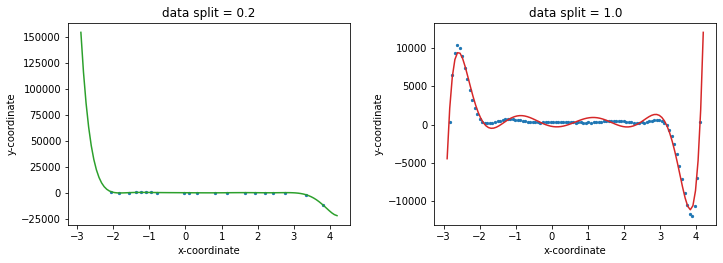

In [21]:
# Plots of Polynomials using the first 20 points and full dataset
lambda_file = 'dataset_wts.txt'
f = open(os.path.join(log_path, lambda_file), 'r')
x, y, data_splits = np.linspace(-2.9, 4.2, 100), [], []

for line in f.readlines():
    tokens = line.strip().split()
    y_out = utils.get_output_from_weights(x, line.strip().split()[4])
    y.append(y_out)
    data_splits.append(float(tokens[2][:-1]))
f.close()

fig, axs = plt.subplots(1, 2)
colors = ['tab:green', 'tab:red']
    
for (ax, y_out, split, col) in zip(axs.flat, y, data_splits, colors):
    ax.plot(x, y_out, col)
    n = int(split*100)
    ax.scatter(input_x[:n], target[:n], s=5)
    ax.set(xlabel='x-coordinate', ylabel='y-coordinate')
    ax.set_title(f'data split = {split}')

plt.subplots_adjust(left=0, bottom=0, right=1.5, top=0.7, wspace=0.3, hspace=0.4)

plt.show()